## Import Libraries
Loading all libraries to be used

In [432]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

## Web Crawling
Build Data Set from Internet

In [530]:
test_url = []
categories = ['technology', 'sports', 'world', 'business', 'politics', 'entertainment', 'science', 'travel', 'fashion', 'education']

title = []
category = []
content = []

for categoryIndex in categories:
    for i in range(1, 101):
        # example
        # https://inshorts.com/api/en/search/trending_topics/business?page=4&type=NEWS_CATEGORY
        url = f'https://inshorts.com/api/en/search/trending_topics/{categoryIndex}?page={i}&type=NEWS_CATEGORY'
        response = requests.get(url)
        data = json.loads(response.text)

        for news in data['data']['news_list']:
            if 'news_obj' in news:
                title.append(news['news_obj']['title'])
                category.append(categoryIndex)
                #category.append(news['news_obj']['category_names'])
                content.append(news['news_obj']['content'])
                        
df = pd.DataFrame({'title': title, 'content': content, 'category': category})

In [531]:
news_df = df

# print df
print("Data Frame Printout")
print(len(news_df))
print(news_df.category.value_counts())
print(news_df.head(5), "\n")

# to csv
news_df.to_csv('news.csv')

Data Frame Printout
9855
category
sports           996
education        995
world            994
business         994
technology       993
entertainment    993
politics         992
science          990
fashion          956
travel           952
Name: count, dtype: int64
                                               title  \
0  Got so many texts in 30 mins of getting fired ...   
1  Chinese methane-powered private rocket sends s...   
2  Have We Crossed The Line? AI's 'Nudify' Apps S...   
3  PW812D-powered Falcon 6X business jet enters i...   
4   Startup's That Deffered Their IPO Plans For 2023   

                                             content    category  
0  OpenAI CEO Sam Altman said his iPhone blew up ...  technology  
1  Chinese private space tech startup LandSpace T...  technology  
2  Graphika, a social network analysis company, r...  technology  
3  Dassault Aviation's Falcon 6X jet, powered by ...  technology  
4  After the lull of 2022, when only three startu...  tech

## Text Preprocessing

In [506]:
# Lower Case
news_df['content'] = news_df['content']\
            .apply(lambda x: " ".join(x.lower() for x in x.split()))
news_df['content'].head()
news_df['title'] = news_df['title']\
            .apply(lambda x: " ".join(x.lower() for x in x.split()))
print('Lower Case')
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

Lower Case
                                               title  \
0  got so many texts in 30 mins of getting fired ...   
1  chinese methane-powered private rocket sends s...   
2  have we crossed the line? ai's 'nudify' apps s...   
3  pw812d-powered falcon 6x business jet enters i...   
4   startup's that deffered their ipo plans for 2023   
5       how many startups turned profitable in 2023?   
6  novel vawt design promises twice energy of tod...   
7  this desalination system filters 49,000 liters...   
8  'chatgpt is getting lazier,' complain users; o...   
9  isro's aditya-l1 reveals stunning full-disk im...   

                                             content    category  
0  openai ceo sam altman said his iphone blew up ...  technology  
1  chinese private space tech startup landspace t...  technology  
2  graphika, a social network analysis company, r...  technology  
3  dassault aviation's falcon 6x jet, powered by ...  technology  
4  after the lull of 2022, when only 

In [507]:
import string

# Removing Punctuation
news_df['content'] = news_df['content']\
            .apply(lambda x: "".join([char for char in x if char not in string.punctuation]))
news_df['content'].head(10)
news_df['title'] = news_df['title']\
            .apply(lambda x: "".join([char for char in x if char not in string.punctuation]))
print('Removing Punctuation')
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

Removing Punctuation
                                               title  \
0  got so many texts in 30 mins of getting fired ...   
1  chinese methanepowered private rocket sends sa...   
2  have we crossed the line ais nudify apps spark...   
3  pw812dpowered falcon 6x business jet enters in...   
4    startups that deffered their ipo plans for 2023   
5        how many startups turned profitable in 2023   
6  novel vawt design promises twice energy of tod...   
7  this desalination system filters 49000 liters ...   
8  chatgpt is getting lazier complain users opena...   
9  isros adityal1 reveals stunning fulldisk image...   

                                             content    category  
0  openai ceo sam altman said his iphone blew up ...  technology  
1  chinese private space tech startup landspace t...  technology  
2  graphika a social network analysis company rev...  technology  
3  dassault aviations falcon 6x jet powered by tw...  technology  
4  after the lull of 2022 w

In [508]:
# Removing Stopwards
from nltk.corpus import stopwords
stop = stopwords.words('english')
news_df['content'] = news_df['content']\
            .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
news_df['content'].head(10)
news_df['title'] = news_df['title']\
            .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

                                               title  \
0  got many texts 30 mins getting fired imessage ...   
1  chinese methanepowered private rocket sends sa...   
2     crossed line ais nudify apps spark controversy   
3  pw812dpowered falcon 6x business jet enters se...   
4                   startups deffered ipo plans 2023   
5               many startups turned profitable 2023   
6  novel vawt design promises twice energy todays...   
7  desalination system filters 49000 liters water...   
8  chatgpt getting lazier complain users openai s...   
9  isros adityal1 reveals stunning fulldisk image...   

                                             content    category  
0  openai ceo sam altman said iphone blew texts w...  technology  
1  chinese private space tech startup landspace t...  technology  
2  graphika social network analysis company revea...  technology  
3  dassault aviations falcon 6x jet powered twin ...  technology  
4  lull 2022 three startups went public year 202

In [509]:
# Removing accented characters
import unicodedata
news_df['content'] = news_df['content']\
            .apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
news_df['content'].head(10)
news_df['title'] = news_df['title']\
            .apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

                                               title  \
0  got many texts 30 mins getting fired imessage ...   
1  chinese methanepowered private rocket sends sa...   
2     crossed line ais nudify apps spark controversy   
3  pw812dpowered falcon 6x business jet enters se...   
4                   startups deffered ipo plans 2023   
5               many startups turned profitable 2023   
6  novel vawt design promises twice energy todays...   
7  desalination system filters 49000 liters water...   
8  chatgpt getting lazier complain users openai s...   
9  isros adityal1 reveals stunning fulldisk image...   

                                             content    category  
0  openai ceo sam altman said iphone blew texts w...  technology  
1  chinese private space tech startup landspace t...  technology  
2  graphika social network analysis company revea...  technology  
3  dassault aviations falcon 6x jet powered twin ...  technology  
4  lull 2022 three startups went public year 202

In [510]:
# Word Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

print(news_df['content'].iloc[0])
tokensContent = word_tokenize(news_df['content'].iloc[0])
print('Tokens')
print(tokensContent, '\n')

print(news_df['title'].iloc[0])
tokensTitle = word_tokenize(news_df['title'].iloc[0])
print('Tokens')
print(tokensTitle, '\n')
# to csv
news_df.to_csv('news.csv')

openai ceo sam altman said iphone blew texts within 30 minutes fired ceo last month breaking imessage app phone like unusable notifications nonstop imessage thing stopped working altman said podcast interview trevor noah
Tokens
['openai', 'ceo', 'sam', 'altman', 'said', 'iphone', 'blew', 'texts', 'within', '30', 'minutes', 'fired', 'ceo', 'last', 'month', 'breaking', 'imessage', 'app', 'phone', 'like', 'unusable', 'notifications', 'nonstop', 'imessage', 'thing', 'stopped', 'working', 'altman', 'said', 'podcast', 'interview', 'trevor', 'noah'] 

got many texts 30 mins getting fired imessage broke openai ceo altman
Tokens
['got', 'many', 'texts', '30', 'mins', 'getting', 'fired', 'imessage', 'broke', 'openai', 'ceo', 'altman'] 



[nltk_data] Downloading package punkt to /Users/wing-/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('ceo', 2), ('altman', 2), ('said', 2), ('imessage', 2), ('openai', 1), ('sam', 1), ('iphone', 1), ('blew', 1), ('texts', 1), ('within', 1), ('30', 1), ('minutes', 1), ('fired', 1), ('last', 1), ('month', 1), ('breaking', 1), ('app', 1), ('phone', 1), ('like', 1), ('unusable', 1)]


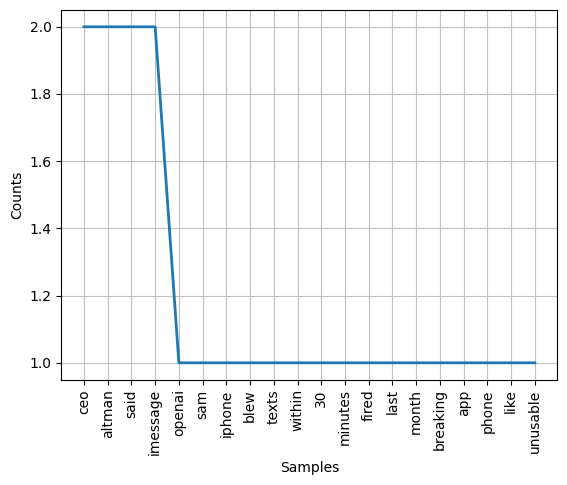

[('got', 1), ('many', 1), ('texts', 1), ('30', 1), ('mins', 1), ('getting', 1), ('fired', 1), ('imessage', 1), ('broke', 1), ('openai', 1)]


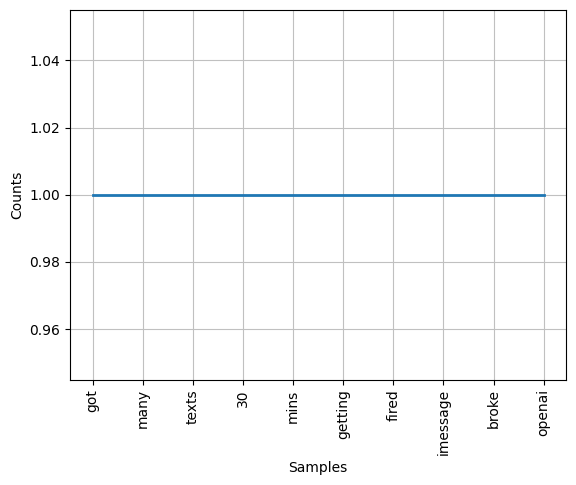

In [511]:
# Frequency Plot
fdist = nltk.FreqDist(tokensContent)
print(fdist.most_common(20))

fdist.plot(20,cumulative=False)
plt.show()

fdist = nltk.FreqDist(tokensTitle)
print(fdist.most_common(10))

fdist.plot(10,cumulative=False)
plt.show()

In [512]:
# Lemmatization
nltk.download('wordnet')
lem = nltk.WordNetLemmatizer()
news_df['content'][:10].apply(lambda x: " ".join([lem.lemmatize(word, 'v') for word in x.split()]))
news_df['title'][:10].apply(lambda x: " ".join([lem.lemmatize(word, 'v') for word in x.split()]))
print('Lemmatization')
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

Lemmatization
                                               title  \
0  got many texts 30 mins getting fired imessage ...   
1  chinese methanepowered private rocket sends sa...   
2     crossed line ais nudify apps spark controversy   
3  pw812dpowered falcon 6x business jet enters se...   
4                   startups deffered ipo plans 2023   
5               many startups turned profitable 2023   
6  novel vawt design promises twice energy todays...   
7  desalination system filters 49000 liters water...   
8  chatgpt getting lazier complain users openai s...   
9  isros adityal1 reveals stunning fulldisk image...   

                                             content    category  
0  openai ceo sam altman said iphone blew texts w...  technology  
1  chinese private space tech startup landspace t...  technology  
2  graphika social network analysis company revea...  technology  
3  dassault aviations falcon 6x jet powered twin ...  technology  
4  lull 2022 three startups went p

[nltk_data] Downloading package wordnet to /Users/wing-/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [513]:
# Team frequency (TF)
tf1 = (news_df['content'][1:2]).apply(lambda x: pd.Series(x.split(" ")).value_counts()).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

,words,tf
0,rocket,3
1,oxygen,2
2,landspace,2
3,launch,2
4,chinese,1


In [514]:
# Inverse Document Frequency (IDF)
for i,word in enumerate(tf1['words']):
  try:
    tf1.loc[i, 'idf'] = np.log(news_df.shape[0]/(len(news_df[news_df['content'].str.contains(word)])))
  except:
    pass
tf1.head()

,words,tf,idf
0,rocket,3,4.673946
1,oxygen,2,6.362521
2,landspace,2,8.502587
3,launch,2,3.084267
4,chinese,1,4.776894


In [515]:
# TF-IDF
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()
print(tf1.head())

       words  tf       idf      tfidf
0     rocket   3  4.673946  14.021837
1     oxygen   2  6.362521  12.725042
2  landspace   2  8.502587  17.005174
3     launch   2  3.084267   6.168534
4    chinese   1  4.776894   4.776894


### WordCloud

WordCloud 是一種數據可視化技術，用於表示文本數據。在 WordCloud 中，最常見的單詞以較大的字體顯示，較少見的單詞以較小的字體顯示。這種視覺化方式可以快速突出顯示文本數據中最重要或最頻繁出現的詞語。

這種視覺化方式可以幫助我們理解新聞文章中最常見的主題或關鍵詞。

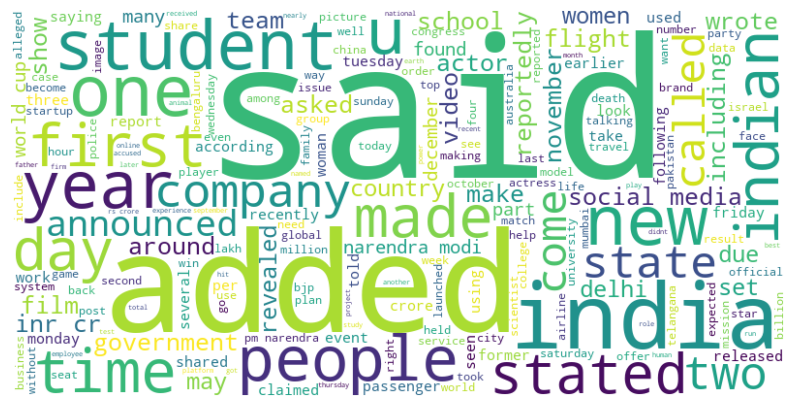

In [516]:
from wordcloud import WordCloud

# Concatenate all news articles into a single string
text = ' '.join(news_df['content'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Sampling data
Count the number of diffrent labels in dataset and plot a pie chart distribution.

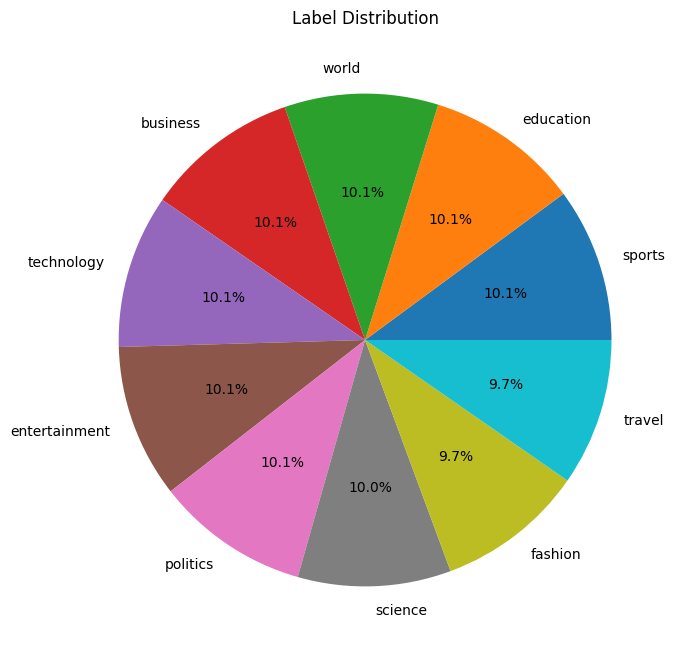

In [532]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each label
label_counts = news_df['category'].value_counts()

# Plot a pie chart of label distribution
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Label Distribution')
plt.show()

## Text Classification

###Model Evaluation

In [533]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
training_corpus, test_corpus = train_test_split(news_df, test_size=0.2, random_state=42)

# Print the sizes of the training and test sets
print("Training Corpus Size:", len(training_corpus))
print("Test Corpus Size:", len(test_corpus))


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn import svm

# Preparing data for SVM model (using the same training_corpus, test_corpus from 
# naive bayes example)
train_data = []
train_labels = []
for index, row in training_corpus.iterrows():
    train_data.append(row['title'])
    train_labels.append(row['category'])

test_data = []
test_labels = []
for index, row in test_corpus.iterrows():
    test_data.append(row['title'])
    test_labels.append(row['category'])

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=4, max_df=0.9)

# Train the feature vectors
train_vectors = vectorizer.fit_transform(train_data)

# Apply model on test data
test_vectors = vectorizer.transform(test_data)

# Perform classification with SVM, kernel=linear
model = svm.SVC(kernel='linear')
model.fit(train_vectors, train_labels)
prediction = model.predict(test_vectors)
print(prediction)

Training Corpus Size: 7884
Test Corpus Size: 1971
['education' 'politics' 'travel' ... 'science' 'travel' 'science']


In [535]:
print(classification_report(test_labels, prediction))

               precision    recall  f1-score   support

     business       0.45      0.47      0.46       215
    education       0.84      0.82      0.83       188
entertainment       0.66      0.75      0.70       185
      fashion       0.84      0.79      0.82       178
     politics       0.85      0.84      0.85       216
      science       0.85      0.82      0.84       194
       sports       0.83      0.78      0.80       198
   technology       0.47      0.48      0.47       204
       travel       0.77      0.73      0.75       203
        world       0.65      0.68      0.66       190

     accuracy                           0.71      1971
    macro avg       0.72      0.72      0.72      1971
 weighted avg       0.72      0.71      0.71      1971



# Multinomial Naive Bayesian
Print the confusion matrix and heat map.

               precision    recall  f1-score   support

     business       0.49      0.41      0.45       215
    education       0.70      0.84      0.77       188
entertainment       0.66      0.71      0.68       185
      fashion       0.79      0.81      0.80       178
     politics       0.88      0.84      0.86       216
      science       0.80      0.81      0.81       194
       sports       0.82      0.81      0.82       198
   technology       0.45      0.41      0.43       204
       travel       0.79      0.79      0.79       203
        world       0.66      0.68      0.67       190

     accuracy                           0.71      1971
    macro avg       0.70      0.71      0.71      1971
 weighted avg       0.70      0.71      0.70      1971



<Axes: >

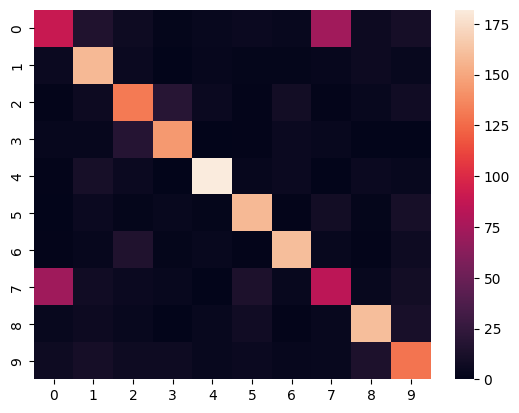

In [536]:
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a DataFrame df with 'title' as features and 'category' as labels
X = news_df['title']
y = news_df['category']

# Convert the labels to numerical values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Convert the text content to numerical feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and test sets
Xtr, Xte, Ytr, Yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
nb = MultinomialNB()
nb.fit(Xtr, Ytr)

# Make predictions
pred = nb.predict(Xte)

# Print the classification report
print(classification_report(Yte, pred, target_names=encoder.classes_))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(Yte, pred))